# <font style="color:blue"> Note: I have a 'TypeError: unhashable type: 'numpy.ndarray'' can you please explain me why this type of error occurs.

thanks,,-----------------



Project 2: Kaggle Competition - Classification</font>

#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Data Loader</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Configuration</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Evaluation Metric</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Train and Validation</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Model</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>Utils</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>Experiment</h3></td><td><h3>5</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>TensorBoard Dev Scalars Log Link</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>9</h3></td> <td><h3>Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>


## <font style="color:green">1. Data Loader [10 Points]</font>

In this section, you have to write a class or methods, which will be used to get training and validation data loader.

You need to write a custom dataset class to load data.

**Note; There is   no separate validation data. , You will thus have to create your own validation set, by dividing the train data into train and validation data. Usually, we do 80:20 ratio for train and validation, respectively.**


For example:

```python
class KenyanFood13Dataset(Dataset):
    """
    
    """
    
    def __init__(self, *args):
    ....
    ...
    
    def __getitem__(self, idx):
    ...
    ...
    
    
```

```
def get_data(args1, *agrs):
    ....
    ....
    return train_loader, test_loader
```

In [1]:

# importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import glob
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt

# importing the libraries
from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

import torch # pytorch dl library 
import torch.nn as nn # neural network 
import torch.nn.functional as F # functions of nn
from torchvision import datasets, models, transforms  # data , transformers, and models torch helpers
from torch.optim import lr_scheduler # learning rate secheduler
from torch.utils.data import Dataset, DataLoader # dataset utilities
from torch.utils.data.sampler import SubsetRandomSampler, WeightedRandomSampler # random weight sampler
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

import numpy as np # linalg
import pandas as pd # processing files
import os # operating system 
from PIL import Image # image pellow lib
from torch.utils.data.dataset import random_split # import random split
from dataclasses import dataclass # class data
import csv # spread file
import matplotlib.pyplot as plt # ploting
import seaborn as sns # pliting
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
path = '/home/mhamdan/hamdan/project2kaggle'
images = path + '/dataset/images/'
pth = path + images
print(pth)

/home/mhamdan/hamdan/project2kaggle/home/mhamdan/hamdan/project2kaggle/dataset/images/


In [3]:
def image_preprocess_transforms(): 
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()])
    return preprocess

In [4]:
def image_common_transforms(mean=(0.4611, 0.4359, 0.3905), std=(0.2193, 0.2150, 0.2109)):
    preprocess = image_preprocess_transforms()
    common_transforms = transforms.Compose([
        preprocess,
        transforms.Normalize(mean, std)])
    return common_transforms

In [5]:
def image_training_transforms(mean=(0.4611, 0.4359, 0.3905), std=(0.2193, 0.2150, 0.2109)):
    train_transforms = transforms.Compose([
        transforms.Resize(256),
        #transforms.RandomRotation(degrees=15),
        #transforms.ColorJitter(),
        #transforms.hflip(),
        #transforms.vflip(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])        
    return train_transforms

In [6]:
def data_loader(dataset, transform, batch_size=32, shuffle=False, num_workers=2):
    loader = DataLoader(dataset, 
                        batch_size=batch_size,
                        num_workers=num_workers,
                        shuffle=shuffle)
    return loader

In [7]:
def get_mean_std(dataset,num_workers=4): 
    transform = image_preprocess_transforms()
    loader = data_loader(dataset, transform)
    mean = std = 0.
    for images,_ in loader:
        batch_samples = images.size(0)
        images = images.view(batch_samples,images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
    mean /= len(loader.dataset)
    std /= len(loader.dataset)
    print('mean: {}, std: {}'.format(mean, std))
    return mean, std

In [8]:
def  data_augmentation_preprocess(mean, std):
    preprocess = image_preprocess_transforms()
    train_transforms = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.CenterCrop(224),
        transforms.RandomChoice([
                #transforms.RandomHorizontalFlip(),
                #transforms.RandomVerticalFlip(),
                transforms.RandomRotation(20, fill=(0,0,0)),
                transforms.RandomCrop(28, padding=4),
                ]),
            transforms.ColorJitter(
            brightness=0.4,
            contrast=0.4,
            saturation=0.4),
            transforms.ToTensor(),
            transforms.RandomErasing(scale=(0.02, 0.16), ratio=(0.3, 1.6)),
            transforms.Normalize(mean,std)
    ])
    return train_transforms

In [9]:
def get_class_distribution_loaders(dataloader_obj, dataset_obj, is_validation):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    if dataloader_obj.batch_size == 1:    
        for _,label_id in dataloader_obj:
            y_idx = label_id.item()
            y_lbl = dataset_obj.idx2class[y_idx]
            count_dict[str(y_lbl)] += 1
            if is_validation == True:
                dataset_obj.set_validation(y_idx)
    else: 
        for _,label_id in dataloader_obj:
            for idx in label_id:
                y_idx = idx.item()
                y_lbl = dataset_obj.idx2class[y_idx]
                count_dict[str(y_lbl)] += 1
                if is_validation == True:
                    dataset_obj.set_validation(y_idx)

            
    return count_dict

In [10]:
def get_target_list_loaders(dataloader_obj):
    target_list = []
    
    if dataloader_obj.batch_size == 1:    
        for _,label_id in dataloader_obj:
            y_idx = label_id.item()
            target_list.append(y_idx)
    else: 
        for _,label_id in dataloader_obj:
            for idx in label_id:
                y_idx = idx.item()
                target_list.append(y_idx)
                
    return target_list

In [11]:
def get_class_distribution(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    
    for element in dataset_obj:
        y_lbl = element[1]
        y_lbl = dataset_obj.idx2class[y_lbl]
        count_dict[y_lbl] += 1
            
    return count_dict

In [12]:
class KenyanFood13Dataset(Dataset):
    """

    """

    def __init__(self, root, labelscsv, transform=None):
        
        self.labels = pd.read_csv(labelscsv)
        self.root = root
        self.transform = transform
        self.validation_transform = None
        classes = self.labels['class'].unique()
        self.classesList = classes.tolist() # convert classes to a list
        #create a dictionary
        self.id2Class = {i: k for i, k in enumerate(self.classesList)}
        self.class2Id = {k: i for i, k in enumerate(self.classesList)}
        self.datadict = {'imgPath':[],'lbl':[],'train':[]}
        imgDir = os.path.join(root, 'dataset', 'images')
        for i, row in self.labels.iterrows():
            imgPath = os.path.join(imgDir, '{}.jpg'.format(row[0]))
            self.dataDict['imgPath'].append(imgPath)
            self.dataDict['lbl'].append(self.class2Id[row[1]])
            self.dataDict['train'].append(True)

    def __getitem__(self,index):
        imgPath = os.path.join(self.root,'dataset','images',str(self.labels.iloc[index,0]))
        imgPath = imgPath + '.jpg'
        image = Image.open(imgPath).convert("RGB")
        if self.transform is not None:
            image = self.transform(image)
        else:
            image = self.validation_transform(image)
            
        target = torch.from_numpy(np.array(self.dataDict['lbl'][index]))
        if self.transform:
            image = self.transform(image)
        return (image,target)
    
    
    def __len__(self):
        return len(self.data_dict['label'])
    def set_validation(self, idx):
        self.data_dict['is_train'][idx] = False
    def set_validation_transform(self, transform):
        self.validation_transform = transform  
    def get_targets():  
        targets = []  
        for key, value in self.class_to_idx:
            targets.append(value)   
        return targets

    def get_data(batch_size, data_root, num_workers=0,transform=None,data_augmentation=False):
        trainCSV =  os.path.join(path,'dataset', 'train.csv')
        dataset =  KenyanFood13Dataset(root,trainCSV, transform=transform)
        dataset_size = len(dataset)
        train_len = int(0.8*len(dataset)) # splitting 80 % training and 20 % validation
        valid_len = len(dataset) - train_len    
        train_dataset, val_dataset = random_split(dataset,[train_len, valid_len])
        mean,std = get_mean_std(train_dataset,num_workers=num_workers)
        common_transforms = image_common_transforms(mean, std)
        if data_augmentation:    
            train_transforms = data_augmentation_preprocess(mean, std)
        else:
            train_transforms = common_transforms
        train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, 
                                                    shuffle=True, num_workers=num_workers)
        test_loader = DataLoader(dataset=val_dataset, batch_size=batch_size,
                                                        shuffle=False, num_workers=num_workers)
        return train_loader, test_loader

In [13]:
from torch.utils.data.dataset import random_split

class KenyanFood13Dataset(Dataset):
    """

    """

    def __init__(self, data_root, transform=None):
        label_csv_path = os.path.join(data_root,'dataset', 'train.csv')
        self.label_df = pd.read_csv(label_csv_path)
#        print(len(self.label_df))
        
        # set transform attribute
        self.transform = transform
        self.validation_transform = None
        
        num_classes = self.label_df['class'].unique()
        self.classes_list = num_classes.tolist()
#        print(num_classes)
#        print(len(num_classes))
        print(self.classes_list)
        
        self.idx2class = {i: key for i, key in enumerate(self.classes_list)}
        self.class_to_idx = {key: i for i, key in enumerate(self.classes_list)}
        print("=====")
        print(self.class_to_idx)
        
        with open('./labels.csv', 'w') as f:
            for key in self.idx2class.keys():
                f.write("%d,%s\n"%(key,self.idx2class[key]))
        
        
        self.data_dict = {
            'image_path': [],
            'label': [],
            'is_train':[]
        }
        
        img_dir = os.path.join(data_root, 'dataset', 'images')

        for index, row in self.label_df.iterrows():
            img_path = os.path.join(img_dir, '{}.jpg'.format(row[0]))
            self.data_dict['image_path'].append(img_path)
            self.data_dict['label'].append(self.class_to_idx[row[1]])#self.classes_list.index(row[1]))
            self.data_dict['is_train'].append(True)

    def __getitem__(self, idx):
        """
        For given index, return images with resize and preprocessing.
        """
        
        image = Image.open(self.data_dict['image_path'][idx]).convert("RGB")
        
        if self.data_dict['is_train'][idx] == True:
            if self.transform is not None:
                image = self.transform(image)
        else:
            if self.validation_transform is not None:
                image = self.validation_transform(image)
            
            
        target = self.data_dict['label'][idx]
        
        return image, target
    
    def __len__(self):
        return len(self.data_dict['label'])
    
    def set_validation(self, idx):
        self.data_dict['is_train'][idx] = False
    
    def set_validation_transform(self, transform):
        self.validation_transform = transform

    
        
    def get_targets():
        
        targets = []
        
        for key, value in self.class_to_idx:
            targets.append(value)
            
        return targets
    
    




def get_data(batch_size, data_root, num_workers=0):
    
    dataset =  KenyanFood13Dataset(data_root, transform=image_training_transforms())
#    dataset =  KenyanFood13Dataset(data_root, transform=image_common_transforms())

    dataset.set_validation_transform(image_common_transforms())
    dataset_size = len(dataset)
    print('Total dataset size {}'.format(dataset_size))
    train_len = int(0.8*len(dataset))
    valid_len = len(dataset) - train_len    
    
    train_dataset, val_dataset = random_split(dataset, [train_len, valid_len])
    print('Train dataset size {}, test dataset size {}'.format(len(train_dataset), len(val_dataset)))
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, 
                                                shuffle=False, num_workers=num_workers)
    validation_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=1,
                                                    shuffle=False, num_workers=num_workers)
    train_class_distribution = get_class_distribution_loaders(train_loader, dataset, is_validation=False)
    validation_class_distribution = get_class_distribution_loaders(validation_loader, dataset, is_validation=True)
    print(train_class_distribution)
    print(validation_class_distribution)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))
    sns.barplot(data = pd.DataFrame.from_dict([train_class_distribution]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Train Set')
    sns.barplot(data = pd.DataFrame.from_dict([validation_class_distribution]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Val Set')
    train_elements_count = 0
    validation_elements_count = 0
    class_count_train = []
    class_count_validation = []
    
    for key, value in train_class_distribution.items():
        train_elements_count += value
        class_count_train.append(value)
        
    print(class_count_train)
    
    for key, value in validation_class_distribution.items():
        validation_elements_count += value
        class_count_validation.append(value)
        
    print(class_count_validation)
    
    print("Train elements count {}".format(train_elements_count))
    

    print("Validation elements count {}".format(validation_elements_count))
   
    
    class_weights_train = 1./torch.tensor(class_count_train, dtype=torch.float)
    class_weights_validation = 1./torch.tensor(class_count_validation, dtype=torch.float)
    
    print("Class weights train {}".format(class_weights_train))
    print("Class weights validation {}".format(class_weights_validation))
    
    target_list_train = get_target_list_loaders(train_loader)
    target_list_validation = get_target_list_loaders(validation_loader)
    
    print("Target list len {} {} {} {} ".format(len(target_list_train), target_list_train[0], target_list_train[5], target_list_train[15]))
    print("Validation list len {} {} {} {} ".format(len(target_list_train), target_list_validation[0], target_list_validation[5], target_list_validation[15]))
    
    
    class_weights_all_train = class_weights_train[target_list_train]
    class_weights_all_validation = class_weights_validation[target_list_validation]
    
    print(class_weights_all_validation)
    
    weighted_sampler_train = WeightedRandomSampler(weights=class_weights_all_train, num_samples=len(class_weights_all_train), replacement=True)
    weighted_sampler_validation = WeightedRandomSampler(weights=class_weights_all_validation, num_samples=len(class_weights_all_validation), replacement=True)
    
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, 
                                               sampler=weighted_sampler_train, shuffle=False, num_workers=num_workers)
    validation_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size,
                                                    sampler=weighted_sampler_validation, shuffle=False, num_workers=num_workers)
    
        
    return train_loader, validation_loader, class_weights_train, class_weights_validation


## <font style="color:green">2. Configuration [5 Points]</font>

**Define your configuration here.**

For example:


```python
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 10 
    epochs_count: int = 50  
    init_learning_rate: float = 0.1  # initial learning rate for lr scheduler
    log_interval: int = 5  
    test_interval: int = 1  
    data_root: str = "/kaggle/input/pytorch-opencv-course-classification/" 
    num_workers: int = 2  
    device: str = 'cuda'  
    
```

In [14]:
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 21  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

In [15]:
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 12  
    epochs_count: int = 20  
    init_learning_rate: float = 1e-5  # initial learning rate for lr scheduler
    decay_rate: float = 1e-3  
    log_interval: int = 500  
    test_interval: int = 1  
    root: str = path 
    num_workers: int = 0  
    device: str = 'cuda'  

## <font style="color:green">3. Evaluation Metric [10 Points]</font>

**Define methods or classes that will be used in model evaluation. For example, accuracy, f1-score etc.**

In [16]:
# epch train/test accuracy
epoch_train_acc = np.array([])
epoch_test_acc = np.array([])

In [17]:
# epoch train/test loss
epoch_train_loss = np.array([])
epoch_test_loss = np.array([])

## <font style="color:green">4. Train and Validation [5 Points]</font>


**Write the methods or classes to be used for training and validation.**

In [18]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int, loss_weights: torch.tensor
) -> None:
    # change model in training mood
    model.train()
    # to get batch loss
    batch_loss = np.array([])
    # to get batch accuracy
    batch_acc = np.array([])

    loss_weights = loss_weights.to(train_config.device)
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # clone target
        indx_target = target.clone()
        # send data to device (its is medatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()
        
        # forward pass to the model
        output = model(data)
        
        # cross entropy loss
        loss = F.cross_entropy(output, target, weight=loss_weights)
        
        # find gradients w.r.t training parameters
        loss.backward()
        # Update parameters using gardients
        optimizer.step()
        
        batch_loss = np.append(batch_loss, [loss.item()])
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
            
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]  
                        
        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()
            
        # accuracy
        acc = float(correct) / float(len(data))
        
        batch_acc = np.append(batch_acc, [acc])
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    print('Epoch: {} \nTrain Loss: {:.6f} Acc: {:.4f}'.format(epoch_idx, epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc

In [19]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
    loss_weights: torch.tensor
) -> float:
    # 
    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    loss_weights = loss_weights.to(train_config.device)
    
    for data, target in test_loader:
        indx_target = target.clone()
        
        
        
        data = data.to(train_config.device)
        
        target = target.to(train_config.device)
        
        output = model(data)
        # add loss for each mini batch
        test_loss += F.cross_entropy(output, target, weight=loss_weights).item()
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
        
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1] 
        
        # add correct prediction count
        count_corect_predictions += pred.cpu().eq(indx_target).sum()

    # average over number of mini-batches
    test_loss = test_loss / len(test_loader)  
    
    # average over number of dataset
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset)
    
    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
        )
    )
    
    return test_loss, accuracy/100.0

## <font style="color:green">5. Model [5 Points]</font>

**Define your model in this section.**

**You are allowed to use any pre-trained model.**

In [20]:
#model = models.resnet101(pretrained=True)
model = models.resnet34(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
for name, child in model.named_children():
   if name in ['layer3', 'layer4']:
       print(name + ' is unfrozen')
       for param in child.parameters():
           param.requires_grad = True
   else:
       print(name + ' is frozen')
       for param in child.parameters():
           param.requires_grad = False

conv1 is frozen
bn1 is frozen
relu is frozen
maxpool is frozen
layer1 is frozen
layer2 is frozen
layer3 is unfrozen
layer4 is unfrozen
avgpool is frozen
fc is frozen


In [22]:
num_ftrs = model.fc.in_features
print("Num features {}".format(num_ftrs))

Num features 512


In [23]:
model.fc = torch.nn.Linear(num_ftrs, 13)
model.fc

Linear(in_features=512, out_features=13, bias=True)

In [24]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## <font style="color:green">6. Utils [5 Points]</font>

**Define those methods or classes, which have  not been covered in the above sections.**

In [25]:
def save_model(model, device, model_dir=path, model_file_name='kenyan13foods101.pt'):
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    model_path = os.path.join(model_dir, model_file_name)

    # make sure you transfer the model to cpu.
    if device == 'cuda':
        model.to('cpu')

    # save the state_dict
    torch.save(model.state_dict(), model_path)
    
    if device == 'cuda':
        model.to('cuda')
    
    return

In [26]:
def load_model(model, model_dir=path, model_file_name='kenyan13foods101.pt'):
    model_path = os.path.join(model_dir, model_file_name)
    # loading the model and getting model parameters by using load_state_dict
    model.load_state_dict(torch.load(model_path))
    return model

In [27]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

## <font style="color:green">7. Experiment [5 Points]</font>

**Choose your optimizer and LR-scheduler and use the above methods and classes to train your model.**

In [28]:
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc, colors, 
                       loss_legend_loc='upper center', acc_legend_loc='upper left', 
                       fig_size=(20, 10), sub_plot1=(1, 2, 1), sub_plot2=(1, 2, 2)):
    
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    
    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])
    
    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))
        
        min_train_loss = train_loss[i].min()
        
        min_val_loss = val_loss[i].min()
        
        plt.plot(x_train, train_loss[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN LOSS ({0:.4})".format(min_train_loss))
        plt.plot(x_val, val_loss[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID LOSS ({0:.4})".format(min_val_loss))
        
    plt.xlabel('epoch no.')
    plt.ylabel('loss')
    plt.legend(loc=loss_legend_loc)
    plt.title('Training and Validation Loss')
        
    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])
    
    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))
        
        max_train_acc = train_acc[i].max() 
        
        max_val_acc = val_acc[i].max() 
        
        plt.plot(x_train, train_acc[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN ACC ({0:.4})".format(max_train_acc))
        plt.plot(x_val, val_acc[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID ACC ({0:.4})".format(max_val_acc))
        
    plt.xlabel('epoch no.')
    plt.ylabel('accuracy')
    plt.legend(loc=acc_legend_loc)
    plt.title('Training and Validation Accuracy')
    
    plt.show()
    
    return   

In [29]:
def main(model, optimizer, scheduler=None, system_configuration=SystemConfiguration(), 
         training_configuration=TrainingConfiguration()):
    
    e_train_loss = np.array([])
    e_test_loss = np.array([])
    e_train_acc = np.array([])
    e_test_acc = np.array([])
    
    # system configuration
    setup_system(system_configuration)

    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config, 
    # else lowers batch_size, num_workers and epochs count
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        batch_size_to_set = 16
        num_workers_to_set = 4

    # data loader
    train_loader, test_loader, train_weights, validation_weights = get_data(
        batch_size=batch_size_to_set,
        data_root=training_configuration.root,
        num_workers=num_workers_to_set,
        
    )
    
   # plt.rcParams["figure.figsize"] = (15, 9)
   # plt.figure
   # for images, labels in test_loader:
    #    for i in range(15):
      #      plt.subplot(3, 5, i+1)
     #       img = transforms.functional.to_pil_image(images[i])
     #       plt.imshow(img)
     #       plt.gca().set_title('Target: {0}'.format(labels[i]))
      #  plt.show()
   #     break    
    
    # Update training configuration
    training_configuration = TrainingConfiguration()
      #  device=device,batch_size=batch_size_to_set,num_workers=num_workers_to_set)
        
    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    best_loss = torch.tensor(np.inf)
    
    
    # Calculate Initial Test Loss
    init_val_loss, init_val_accuracy = validate(training_configuration, model, test_loader, validation_weights)
    print("Initial Test Loss : {:.6f}, \nInitial Test Accuracy : {:.3f}%\n".format(init_val_loss, 
                                                                                   init_val_accuracy*100))
    
    # trainig time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):
        
        # Train
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch, train_weights)
        
        print("Epoch {}  train loss {}".format(epoch, train_loss))
        
        e_train_loss = np.append(e_train_loss, [train_loss])
        
        e_train_acc = np.append(e_train_acc, [train_acc])
        
        print("Global Epoch train loss len {}".format(len(e_train_loss)))

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time
        
        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        # Validate
        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, test_loader, validation_weights)
            
            e_test_loss = np.append(e_test_loss, [current_loss])
            
            print("Epoch {}  test loss {}".format(epoch, current_loss))
            print("Global Epoch test loss len {}".format(len(e_test_loss)))
        
            e_test_acc = np.append(e_test_acc, [current_accuracy])
            
            if current_loss < best_loss:
                best_loss = current_loss
                print('Model Improved. Saving the Model...\n')
                save_model(model, device=training_configuration.device)
        
        if scheduler is not None:
#            scheduler.step(current_loss)
            scheduler.step()
        
#    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_, loss))
    print("before exit losses len {} {} {} {}".format(len(e_train_loss), len(e_test_loss), len(e_train_acc), len(e_test_acc)))
    
    return model, train_loader, test_loader, e_train_loss, e_test_loss, e_train_acc, e_test_acc

In [30]:
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc, colors, 
                       loss_legend_loc='upper center', acc_legend_loc='upper left', 
                       fig_size=(20, 10), sub_plot1=(1, 2, 1), sub_plot2=(1, 2, 2)):
    
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    
    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])
    
    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))
        
        min_train_loss = train_loss[i].min()
        
        min_val_loss = val_loss[i].min()
        
        plt.plot(x_train, train_loss[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN LOSS ({0:.4})".format(min_train_loss))
        plt.plot(x_val, val_loss[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID LOSS ({0:.4})".format(min_val_loss))
        
    plt.xlabel('epoch no.')
    plt.ylabel('loss')
    plt.legend(loc=loss_legend_loc)
    plt.title('Training and Validation Loss')
        
    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])
    
    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))
        
        max_train_acc = train_acc[i].max() 
        
        max_val_acc = val_acc[i].max() 
        
        plt.plot(x_train, train_acc[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN ACC ({0:.4})".format(max_train_acc))
        plt.plot(x_val, val_acc[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID ACC ({0:.4})".format(max_val_acc))
        
    plt.xlabel('epoch no.')
    plt.ylabel('accuracy')
    plt.legend(loc=acc_legend_loc)
    plt.title('Training and Validation Accuracy')
    
    fig.savefig('sample_loss_acc_plot.png')
    plt.show()
    
    return   

In [31]:
train_config = TrainingConfiguration()


In [32]:
optimizer = optim.SGD(filter(lambda x: x.requires_grad, model.parameters()), lr=0.001, momentum=0.9)

#optimizer = optim.SGD(filter(lambda x: x.requires_grad, model.parameters()), lr=0.005, momentum=0.9)
#optimizer = torch.optim.Adam(filter(lambda x: x.requires_grad, model.parameters()), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

['githeri', 'ugali', 'kachumbari', 'matoke', 'sukumawiki', 'bhaji', 'mandazi', 'kukuchoma', 'nyamachoma', 'pilau', 'chapati', 'masalachips', 'mukimo']
=====
{'githeri': 0, 'ugali': 1, 'kachumbari': 2, 'matoke': 3, 'sukumawiki': 4, 'bhaji': 5, 'mandazi': 6, 'kukuchoma': 7, 'nyamachoma': 8, 'pilau': 9, 'chapati': 10, 'masalachips': 11, 'mukimo': 12}
Total dataset size 6536
Train dataset size 5228, test dataset size 1308
{'githeri': 381, 'ugali': 516, 'kachumbari': 398, 'matoke': 396, 'sukumawiki': 336, 'bhaji': 496, 'mandazi': 498, 'kukuchoma': 135, 'nyamachoma': 624, 'pilau': 254, 'chapati': 678, 'masalachips': 338, 'mukimo': 178}
{'githeri': 98, 'ugali': 112, 'kachumbari': 96, 'matoke': 87, 'sukumawiki': 66, 'bhaji': 136, 'mandazi': 122, 'kukuchoma': 38, 'nyamachoma': 160, 'pilau': 75, 'chapati': 184, 'masalachips': 100, 'mukimo': 34}
[381, 516, 398, 396, 336, 496, 498, 135, 624, 254, 678, 338, 178]
[98, 112, 96, 87, 66, 136, 122, 38, 160, 75, 184, 100, 34]
Train elements count 5228
Va

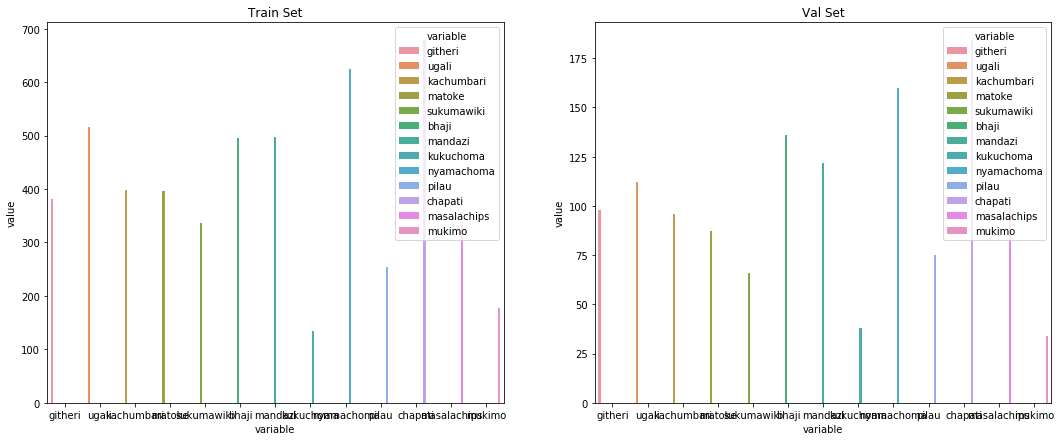

In [33]:
import time

model, train_loader, test_loader, epoch_train_loss, epoch_test_loss, epoch_train_acc, epoch_test_acc = main(model, optimizer, scheduler=scheduler)

train acc  20  ephocs
test acc  20  ephocs
train loss  20  ephocs
test loss  20  ephocs


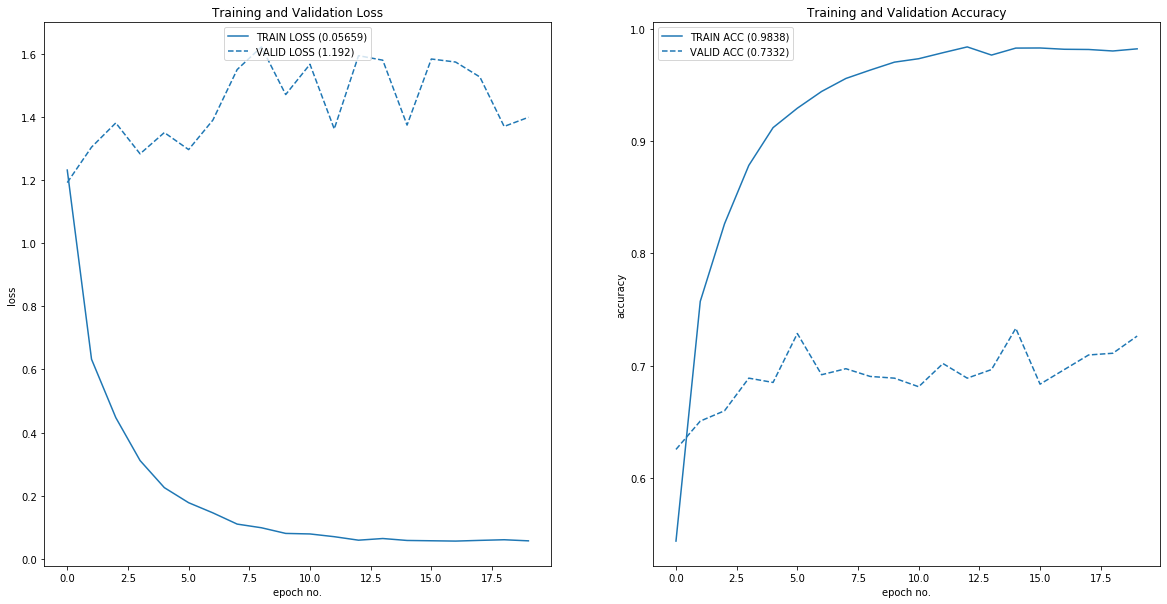

In [36]:
print("train acc  {}".format(len(epoch_train_acc)), ' ephocs')
print("test acc  {}".format(len(epoch_test_acc)), ' ephocs')
print("train loss  {}".format(len(epoch_train_loss)), ' ephocs')
print("test loss  {}".format(len(epoch_test_loss)), ' ephocs')

      
plot_loss_accuracy(train_loss=[epoch_train_loss], 
                   val_loss=[epoch_test_loss], 
                   train_acc=[epoch_train_acc], 
                   val_acc=[epoch_test_acc], 
                   colors=['blue'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

In [37]:
save_model(model, 'cuda')

In [38]:
def prediction(model, device, batch_input):
    # send model to cpu/cuda according to your system configuration
    model.to(device)
    # it is important to do model.eval() before prediction
    model.eval()
    data = batch_input.to(device)
    output = model(data)
    # Score to probability using softmax
    prob = F.softmax(output, dim=1)
    # get the max probability
    pred_prob = prob.data.max(dim=1)[0]
    # get the index of the max probability
    pred_index = prob.data.max(dim=1)[1]
    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

submistion to kaggle

In [46]:
class KenyanFood13DatasetTest(Dataset):
    def __init__(self, root, transform=None):
        lblTest = os.path.join(root,'dataset', 'test.csv')
        self.testImages = pd.read_csv(lblTest)
        print("Number test samples {}".format(len(self.testImages)))
        # set transform attribute
        self.transform = transform
        self.dataDict = {'imgPath': [],'img': []}
        img_dir = os.path.join(root, 'dataset', 'images')
        for i, row in self.testImages.iterrows():
            imgPath = os.path.join(img_dir, '{}.jpg'.format(row[0]))
            self.dataDict['imgPath'].append(imgPath)
            self.dataDict['img'].append(row[0])

    def __getitem__(self, idx): 
        image = Image.open(self.dataDict['imgPath'][idx]).convert("RGB")
        if self.transform is not None:
            image = self.transform(image)
        img = self.dataDict['img'][idx]
        return image, img
    
    def __len__(self):
        return len(self.dataDict['img'])

In [47]:
image_csv_path = os.path.join(path,'dataset', 'test.csv')
image_df = pd.read_csv(image_csv_path)
print("Number test samples {}".format(len(image_df)))

Number test samples 1638


In [48]:
test_dataset =  KenyanFood13DatasetTest(path, transform=image_common_transforms())
data_len = test_dataset.__len__()
print("Test data length is {}".format(data_len))

Number test samples 1638
Test data length is 1638


In [49]:
model = load_model(model)

classes_labels = {}

reader = csv.reader(open('./labels.csv'))



In [51]:

for row in reader:
    key = row[0]
    if key in classes_labels:
        print('duplicated rows ...')
        pass
    classes_labels[int(key)] = row[1]
print(classes_labels)


{0: 'githeri', 1: 'ugali', 2: 'kachumbari', 3: 'matoke', 4: 'sukumawiki', 5: 'bhaji', 6: 'mandazi', 7: 'kukuchoma', 8: 'nyamachoma', 9: 'pilau', 10: 'chapati', 11: 'masalachips', 12: 'mukimo'}


In [53]:

submit_data = {}

inputs = []

for i in range(data_len):
    
    img, img_name = test_dataset.__getitem__(i)
    print(img, '  ', img_name)
    inputs.append(img)
    
    inputs = torch.stack(inputs)
    
    cls, prob = prediction(model, 'cuda', batch_input=inputs)
    submit_data[img_name] = classes_labels[cls]
    inputs.clear()
    


tensor([[[-0.1356, -0.1356, -0.1713,  ..., -1.3337, -1.2979, -1.2800],
         [-0.1713, -0.1534, -0.1892,  ..., -1.2443, -1.2443, -1.2264],
         [-0.1892, -0.1892, -0.2250,  ..., -1.2085, -1.2264, -1.2443],
         ...,
         [-1.2264, -1.1191, -1.2085,  ...,  1.6169,  1.6527,  1.6705],
         [-1.2800, -1.1548, -1.1906,  ...,  1.6169,  1.6348,  1.6527],
         [-1.3873, -1.2264, -1.1548,  ...,  1.5633,  1.6169,  1.6705]],

        [[-0.0028, -0.0028, -0.0393,  ..., -1.1702, -1.1337, -1.1154],
         [-0.0393, -0.0211, -0.0575,  ..., -1.0790, -1.0790, -1.0607],
         [-0.0575, -0.0575, -0.0940,  ..., -1.0425, -1.0607, -1.0790],
         ...,
         [-1.0242, -0.9148, -1.0060,  ...,  1.8029,  1.8394,  1.8576],
         [-1.0790, -0.9513, -0.9878,  ...,  1.8029,  1.8394,  1.8212],
         [-1.2431, -1.0790, -1.0060,  ...,  1.7664,  1.8029,  1.8029]],

        [[ 0.0636,  0.0636,  0.0265,  ..., -0.9962, -0.9591, -0.9405],
         [ 0.0265,  0.0450,  0.0079,  ..., -0

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
    
with open('./submission.csv', 'w') as f:
    for key in submit_data.keys():
        f.write("%s,%s\n"%(key,submit_data[key]))
        
print(submit_data)

## <font style="color:green">8. TensorBoard Dev Scalars Log Link [5 Points]</font>

**Share your TensorBoard scalars logs link here You can also share (not mandatory) your GitHub link, if you have pushed this project in GitHub.**


For example, [Find Project2 logs here](https://tensorboard.dev/experiment/kMJ4YU0wSNG0IkjrluQ5Dg/#scalars).

## <font style="color:green">9. Kaggle Profile Link [50 Points]</font>

**Share your Kaggle profile link  with us here to score , points in  the competition.**

**For full points, you need a minimum accuracy of `75%` on the test data. If accuracy is less than `70%`, you gain  no points for this section.**


**Submit `submission.csv` (prediction for images in `test.csv`), in the `Submit Predictions` tab in Kaggle, to get evaluated for  this section.**